# Regresión lineal: motivación

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4.5, 3]

## El problema

Tenemos 100 estudiantes, de los que sabemos:
 * el número de horas que estudiaron para su examen
 * la nota que obtuvieron (de 0 a 100)

In [4]:
data = pd.read_csv("./datasets/hours_vs_mark.csv")

In [5]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


Nos gustaría entender la relación $$nota = f(horas)$$

de manera que podamos **predecir la nota esperada** que obtendremos estudiando un determinado número de horas

## Exploración del data

In [7]:
data.shape

(100, 2)

In [8]:
data.sample(5)

,horas,nota
54,170,5
79,698,83
80,941,100
26,152,23
62,412,48


<Axes: xlabel='horas', ylabel='Count'>

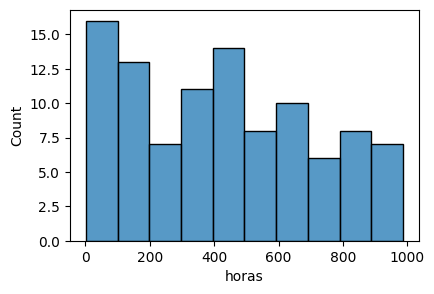

In [13]:
sns.histplot(data.horas, bins=10)

In [19]:
data.nota.median()

44.0

<Axes: xlabel='nota', ylabel='Count'>

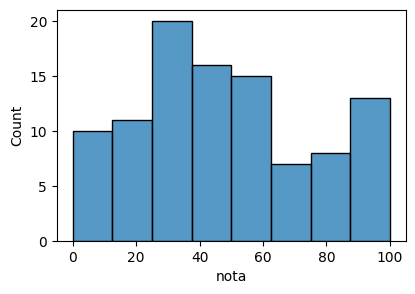

In [14]:
sns.histplot(data.nota)

In [22]:
data.sample(10).sort_values("nota")

,horas,nota
91,36,3
53,217,13
31,60,19
21,487,43
98,310,46
65,439,48
78,649,79
79,698,83
23,796,91
0,865,95


In [24]:
data.corr().round(3)

,horas,nota
horas,1.000,0.867
nota,0.867,1.000


<Axes: xlabel='horas', ylabel='nota'>

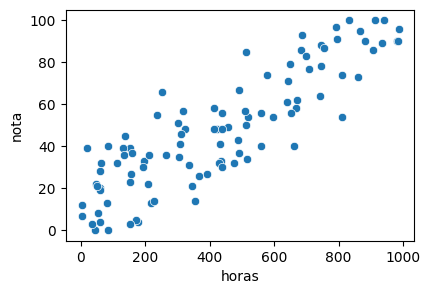

In [23]:
sns.scatterplot(x=data.horas, y=data.nota)

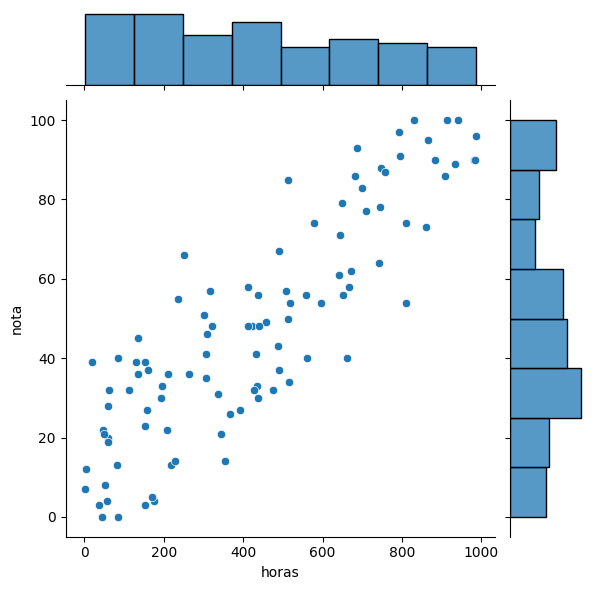

In [26]:
sns.jointplot(x=data.horas, y=data.nota)

## El modelo lineal

Probemos con una relación lineal, $$Y = m * X + n$$

$m$ es la pendiente  
$n$ es el valor de $Y$ cuando $X=0$ 

<Axes: xlabel='horas', ylabel='nota'>

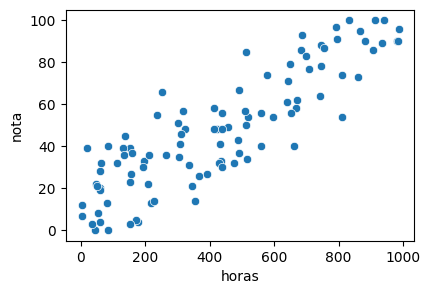

In [29]:
sns.scatterplot(x=data.horas, y=data.nota)

$$nota = m * horas + n$$

Queremos encontrar los valores de $m$ and $n$ que *mejor* modelan nuestros datos

Conjeturemos:

$$nota = 0.1 * horas$$

$$nota_2 = 0.09 * horas + 10 $$

Qué modelo lo hace mejor?

In [33]:
data.shape

(100, 2)

In [34]:
data.head()

,horas,nota
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [35]:
data["prediction_1"] = data.horas * 0.1

In [82]:
data["prediction_2"] = data.horas * 0.09 + 10

In [83]:
# semi-random prediction
data["prediction_3"] = np.random.uniform(40, 60, size=data.shape[0]).round(2)

In [84]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,43.21,72.25,83.7225,2507.0049
1,4,12,0.4,10.36,42.56,134.56,13.2496,2083.9225
2,305,35,30.5,37.45,40.97,20.25,0.2025,76.2129
3,437,56,43.7,49.33,58.64,151.29,75.1689,163.3284
4,682,86,68.2,71.38,43.43,316.84,276.2244,1351.2976
5,560,40,56.0,60.40,51.62,256.00,338.5600,170.5636
6,367,26,36.7,43.03,54.95,114.49,225.9009,290.0209
7,861,73,86.1,87.49,46.45,171.61,156.0001,1019.5249
8,59,20,5.9,15.31,59.97,198.81,44.7561,635.5441
9,514,85,51.4,56.26,49.30,1128.96,944.9476,655.3600


Qué hace a un modelo "mejor"?

Veamos cuál es el error de cada modelo

Utilizaremos el [error cuadrático medio](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio)

In [85]:
data['error_1'] = (data.nota - data.prediction_1) ** 2

In [86]:
data['error_2'] = (data.nota - data.prediction_2) ** 2

In [87]:
data['error_3'] = (data.nota - data.prediction_3) ** 2

In [88]:
data.head(10)

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,43.21,72.25,51.1225,2682.2041
1,4,12,0.4,10.36,42.56,134.56,2.6896,933.9136
2,305,35,30.5,37.45,40.97,20.25,6.0025,35.6409
3,437,56,43.7,49.33,58.64,151.29,44.4889,6.9696
4,682,86,68.2,71.38,43.43,316.84,213.7444,1812.2049
5,560,40,56.0,60.40,51.62,256.00,416.1600,135.0244
6,367,26,36.7,43.03,54.95,114.49,290.0209,838.1025
7,861,73,86.1,87.49,46.45,171.61,209.9601,704.9025
8,59,20,5.9,15.31,59.97,198.81,21.9961,1597.6009
9,514,85,51.4,56.26,49.30,1128.96,825.9876,1274.4900


In [89]:
data.error_1.mean().round(1)

234.8

In [90]:
data.error_2.mean().round(1)

192.3

In [91]:
data.error_3.mean().round(1)

811.4

Dibujemos las rectas de nuestros modelos

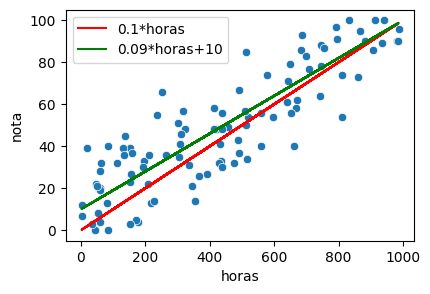

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='0.1*horas')
plt.plot(data.horas, data.prediction_2, color='g', label='0.09*horas+10')

plt.legend()

In [93]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,43.21,72.25,51.1225,2682.2041
1,4,12,0.4,10.36,42.56,134.56,2.6896,933.9136
2,305,35,30.5,37.45,40.97,20.25,6.0025,35.6409
3,437,56,43.7,49.33,58.64,151.29,44.4889,6.9696
4,682,86,68.2,71.38,43.43,316.84,213.7444,1812.2049


### Entendiendo el error del modelo como una función de `m` y `n`

$$nota = m * horas + n$$

`L` significa Loss (la palabra que se utiliza como "error" en Data Science)

$$Error = L(m, n)$$

$$nota =0.1* horas$$

$$L(m=0.1,n=0) = 234$$

$$nota_2 =0.09*horas + 10$$

$$L(m=0.09, n=10) =192.3 $$

Si llamamos:
 - $y_i$ a la nota real del estudiante $i$
 - $\hat{y_i}$ la nota predicha para el estudiante $i$  

El error es $$L(m, n) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum (y_i - (m * x_i + n))^2 $$

y siendo cuadrática en `m` y `n`, la función `L` tiene un mínimo global

## El modelo lineal óptimo

Podemos encontrar **el mejor** modelo lineal?

`scikit-learn` es una librería de Python para entrenar modelos

In [ ]:
!pip install scikit-learn

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression()

In [97]:
lr

LinearRegression()

In [98]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [99]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,43.21,72.25,51.1225,2682.2041
1,4,12,0.4,10.36,42.56,134.56,2.6896,933.9136
2,305,35,30.5,37.45,40.97,20.25,6.0025,35.6409
3,437,56,43.7,49.33,58.64,151.29,44.4889,6.9696
4,682,86,68.2,71.38,43.43,316.84,213.7444,1812.2049


In [100]:
# train the model
# X predictors: 1 or more columns
# y target: 1 column
lr.fit(
    # X = data[["horas", "edad", "horasdesueño"]],
    X = data[["horas"]],
    y = data.nota,
)

LinearRegression()

$$nota = m * horas + n$$

In [101]:
# access coefficients m and n. it has 1 entry per predictor variable
lr.coef_

array([0.08437787])

Si tuviéramos 3 predictores en vez de uno, la función sería algo así:
$$nota = m_1 * horas + m_2 * edad + m_3 * horasdesueño + n$$

In [102]:
optimal_m = lr.coef_[0]

In [103]:
optimal_m

0.08437787096170372

In [104]:
optimal_n = lr.intercept_

In [105]:
optimal_n

11.78070717807148

$$nota = 0.084 * horas + 11.8$$

In [106]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3
0,865,95,86.5,87.85,43.21,72.25,51.1225,2682.2041
1,4,12,0.4,10.36,42.56,134.56,2.6896,933.9136
2,305,35,30.5,37.45,40.97,20.25,6.0025,35.6409
3,437,56,43.7,49.33,58.64,151.29,44.4889,6.9696
4,682,86,68.2,71.38,43.43,316.84,213.7444,1812.2049


In [107]:
data["best_prediction"] = (data.horas * optimal_m + optimal_n).round(2)

In [108]:
data["best_prediction_error"] = (data.best_prediction - data.nota) ** 2

In [109]:
data.head()

,horas,nota,prediction_1,prediction_2,prediction_3,error_1,error_2,error_3,best_prediction,best_prediction_error
0,865,95,86.5,87.85,43.21,72.25,51.1225,2682.2041,84.77,104.6529
1,4,12,0.4,10.36,42.56,134.56,2.6896,933.9136,12.12,0.0144
2,305,35,30.5,37.45,40.97,20.25,6.0025,35.6409,37.52,6.3504
3,437,56,43.7,49.33,58.64,151.29,44.4889,6.9696,48.65,54.0225
4,682,86,68.2,71.38,43.43,316.84,213.7444,1812.2049,69.33,277.8889


In [111]:
data.best_prediction_error.mean()

189.308348

In [112]:
data.error_2.mean()

192.25725599999998

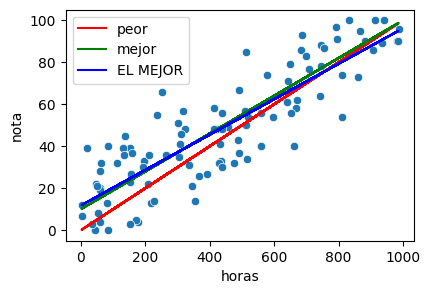

In [114]:
fig, ax = plt.subplots()
sns.scatterplot(x=data.horas, y=data.nota)

plt.plot(data.horas, data.prediction_1, color='r', label='peor')
plt.plot(data.horas, data.prediction_2, color='g', label='mejor')
plt.plot(data.horas, data.best_prediction, color='blue', label='EL MEJOR')

plt.legend()

Utilizando nuestro modelo para hacer predicciones

In [124]:
n_horas = 1000

$$nota = 0.0844*horas + 11.78$$

In [125]:
optimal_m * n_horas + optimal_n

96.1585781397752

In [128]:
lr.predict(np.array([[750], [200], [350]])).round(2)

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.06, 28.66, 41.31])

## No todo es lineal

In [131]:
dff = pd.DataFrame({"age": [20, 30, 40, 50, 60, 70, 80], "prob_acc": np.array([1, 0.7, 0.5, 0.4, 0.5, 0.7, 1]) - 0.3})

(0.0, 1.0)

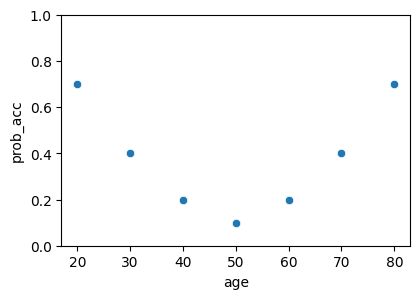

In [133]:
g = sns.scatterplot(x=dff.age, y=dff.prob_acc)
g.set_ylim(0, 1)

$p_{acc} \sim age²$

In [136]:
dff["age2"] = dff.age ** 2

In [139]:
lr = LinearRegression()

In [140]:
lr.fit(
    X=dff[["age", "age2"]],
    y=dff.prob_acc
)

LinearRegression()

In [144]:
lr.predict(np.array([[20, 400], [25, 625], [40, 1600], [50, 2500], [60, 3600], [70, 4900], [80, 6400]])).round(2)

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.71, 0.53, 0.19, 0.13, 0.19, 0.39, 0.71])

In [137]:
dff.head()

,age,prob_acc,age2
0,20,0.7,400
1,30,0.4,900
2,40,0.2,1600
3,50,0.1,2500
4,60,0.2,3600


## Alinea tu métrica apropiadamente con el caso de uso

Una métrica mide numéricalmente qué tal lo hace un modelo

**Motivación**: Somos una empresa que vende tupper de comida preparada cada semana

Tenemos que predecir el número de cajas de comida a preparar cada semana, y esperar que cuadre con la demanda

In [150]:
data2 = pd.DataFrame({
    "boxes": [100, 150, 160, 90, 220], 
    "pred_dani": [105, 153, 172, 93, 244], 
    "pred_laura": [98, 146, 166, 88, 214]
})

In [151]:
data2

,boxes,pred_dani,pred_laura
0,100,105,98
1,150,153,146
2,160,172,166
3,90,93,88
4,220,244,214


Qué modelo funciona mejor?

In [160]:
data2["mse_dani"] = (data2["boxes"] - data2["pred_dani"]) ** 2
data2["mse_laura"] = (data2["boxes"] - data2["pred_laura"]) ** 2

In [161]:
data2.head()

,boxes,pred_dani,pred_laura,mse_dani,mse_laura
0,100,105,98,25,4
1,150,153,146,9,16
2,160,172,166,144,36
3,90,93,88,9,4
4,220,244,214,576,36


In [162]:
data2.mse_dani.mean()

152.6

In [163]:
data2.mse_laura.mean()

19.2

Según el criterio (la métrica) del error cuadrático medio (MSE), el modelo de Laura funciona mejor

**pero**:
 - si hubiéramos obedecido a ese modelo, 4 veces de 5 dejamos a clientes sin servir. Faltarían cajas de comida.
 - si hubiéramos obedecido al otro modelo (Dani), nunca dejaríamos clientes sin servir. Sobrarían cajas de comida.

Hemos de construir métricas customizadas:

In [ ]:
30 + 30 * 0.95 + 30 * 0.95 * 0.95

$30 (1 + 0.95 + 0.95² + ...) = \frac{30}{1-0.95} = 600$

Si a alguien no le sirvo caja, se va a ir un 30% de las veces

In [165]:
600 * 0.3

180.0

In [167]:
error_sobra = 3
error_falta = 180

In [169]:
data2.rename(columns={"pred_laura": "pred_2", "pred_dani": "pred_1"}, inplace=True)

In [170]:
data2["error_sobra_1"] = (data2["pred_1"] - data2["boxes"]) * (data2["pred_1"] - data2["boxes"] > 0) * error_sobra

In [171]:
data2["error_falta_1"] = (- data2["pred_1"] + data2["boxes"]) * (data2["pred_1"] - data2["boxes"] < 0) * error_falta

In [172]:
data2["error_sobra_2"] = (data2["pred_2"] - data2["boxes"]) * (data2["pred_2"] - data2["boxes"] > 0) * error_sobra

In [173]:
data2["error_falta_2"] = (- data2["pred_2"] + data2["boxes"]) * (data2["pred_2"] - data2["boxes"] < 0) * error_falta

In [174]:
data2["loss_1"] = data2.error_sobra_1 + data2.error_falta_1
data2["loss_2"] = data2.error_sobra_2 + data2.error_falta_2

In [176]:
del data2["mse_dani"]
del data2["mse_laura"]

In [177]:
data2

,boxes,pred_1,pred_2,error_sobra_1,error_falta_1,error_sobra_2,error_falta_2,loss_1,loss_2
0,100,105,98,15,0,0,360,15,360
1,150,153,146,9,0,0,720,9,720
2,160,172,166,36,0,18,0,36,18
3,90,93,88,9,0,0,360,9,360
4,220,244,214,72,0,0,1080,72,1080


In [178]:
data2.loss_1.sum()

141

In [179]:
data2.loss_2.sum()

2538

Y, con esta **métrica alineada con el negocio**, el modelo 1 es mejor